In [28]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar
import dust_size_dist as sizedist

from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

import pickle

import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm

import MCMCFit as mcmc

%matplotlib inline

In [30]:
filename = "TotaHeating_parametric_50pcent.pkl"
data_dir = "/home/jcibanezm/codes/run/PeHeat/ParametricHeating/" #DustBox
#data_dir = "/Users/juan/codes/run/PeHeating/" #Laptop

pkl_file = open("%s%s"%(data_dir, filename))
heatDict = pickle.load(pkl_file)
pkl_file.close

<function close>

In [75]:
too_high = np.where(heatDict["nH"] > 1.0e6)

arrs = []
newdict = {"info":"purged the very large values"}

for key in heatDict.keys():
    #arrs.append(0)
    if key!="info":
        #print(key)
        heatDict[key] = np.delete(heatDict[key], too_high)


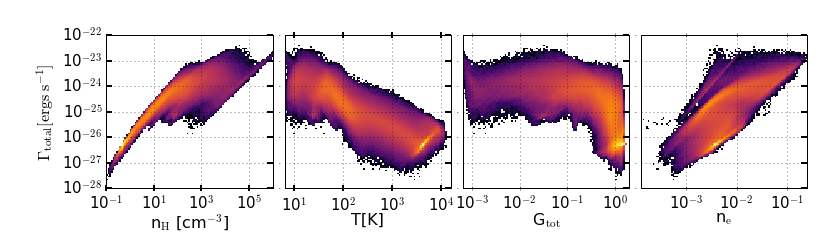

In [83]:
xsize = 11
ysize = 3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.183
wpad = 0.10
wwpad = 0.015

xs_panel = 0.84 / nfigs_x 
ys_panel = 0.708 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return "10$^{%.1i}$"%value



##########################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["nH"]), np.log10(heatDict["PeHtot"]), bins=100, norm=LogNorm(), cmap="inferno", range=[[-1, 6.0],[-28, -22]])

ax.grid("on")
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("$\Gamma_{\mathrm{total}}[\mathrm{ergs \; s}^{-1}]$", fontsize=16)
ax.set_xlabel("n$_{\mathrm{H}}$ [cm$^{-3}$]", fontsize=16, labelpad=-1)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


majors = [-1, 1, 3, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["temp"]), np.log10(heatDict["PeHtot"]), bins=100, norm=LogNorm(), cmap="inferno", range=[[0.8, 4.2],[-28, -22]])

ax.grid("on")

ax.set_xlabel("T[K]", fontsize=16, labelpad=-1)
ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', direction= 'inout', labelsize=15, pad=0)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)
ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["Gtot"]), np.log10(heatDict["PeHtot"]), bins=100, norm=LogNorm(), cmap="inferno", range=[[-3.2, np.log10(2.0)],[-28, -22]])

ax.grid("on")

ax.set_xlabel("G$_{\mathrm{tot}}$", fontsize=16, labelpad=-1)
ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', direction= 'inout', labelsize=15)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)


#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
majors = [-3, -2, -1, 0]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["new_ne"]), np.log10(heatDict["PeHtot"]), bins=100, norm=LogNorm(), cmap="inferno", range=[[-3.9, np.log10(np.max(heatDict["new_ne"]))],[-28, -22]])

ax.grid("on")

ax.set_xlabel("n$_{\mathrm{e}}$", fontsize=16, labelpad=-1)
ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', direction= 'inout', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

#ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off


ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric.pdf", format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric.pdf", format="pdf")

fig.show()

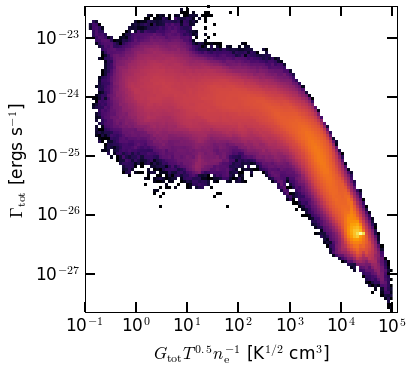

In [78]:
fig = plt.figure(figsize=(5.5,5))

ax = fig.add_axes([0.185, 0.13, 0.79, 0.85])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (heatDict["Gtot"])*np.sqrt(heatDict["temp"])/heatDict["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(heatDict["PeHtot"]), bins=100, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=17, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=17, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$\Gamma_{\mathrm{tot}}$ [ergs s$^{-1}$]", fontsize=17)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=17)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

ax.set_xlim(-1, 5.1)

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric_GTn.pdf", format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric_GTn.pdf", format="pdf")


fig.show()

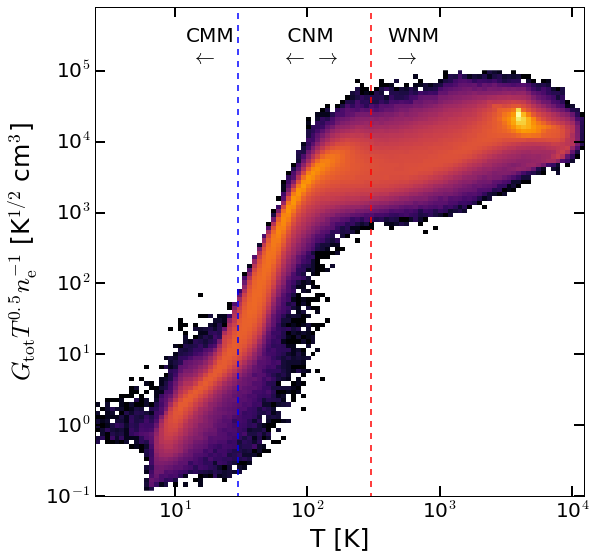

In [81]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.13, 0.11, 0.85, 0.85])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


#GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(heatDict["temp"]),np.log10(GTn), bins=100, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("T [K]", fontsize=25)
ax.set_ylabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

ax.plot([np.log10(30), np.log10(30)], [-2, 1.0e5], "--b", linewidth=1.5)
ax.plot([np.log10(300), np.log10(300)], [-2, 1.0e5], "--r", linewidth=1.5)

ax.text(np.log10(12), 5.1, "CMM\n $\\leftarrow$", fontsize=20)
ax.text(1.8, 5.1, " CNM\n$\\leftarrow$ $\\rightarrow$", fontsize=20)
ax.text(2.6, 5.1, "WNM\n $\\rightarrow$", fontsize=20)


ax.set_ylim(-1., 5.9)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_0_GTnDist.pdf", format="pdf")


fig.show()

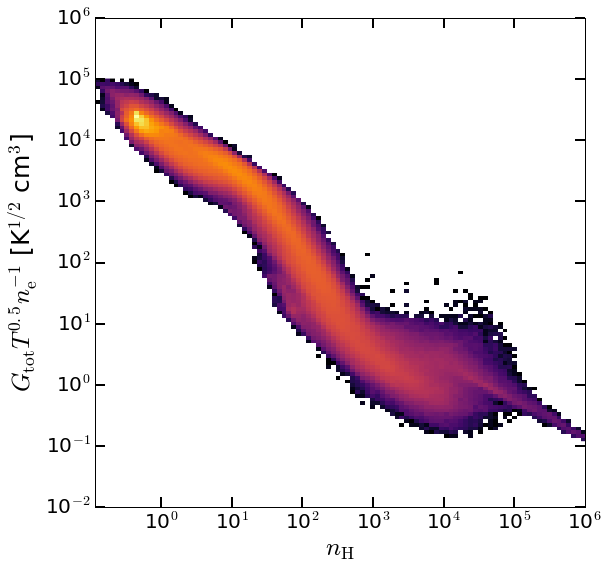

In [82]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.13, 0.11, 0.85, 0.85])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


#GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(heatDict["nH"]),np.log10(GTn), bins=100, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("$n_{\mathrm{H}}$", fontsize=25)
ax.set_ylabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")


ax.set_ylim(-2, 6.0)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_0_GTnDist.pdf", format="pdf")


fig.show()

I need to compute the power absorved by dust grains!. Right now I have no idea how to do that.

In [88]:
cells_per_proc = 100

for i in range(cells_per_proc):
    print(i)
    if (i*10.%cells_per_proc==0):
        print("Progress %i"%(i*100.//cells_per_proc))

0
Progress 0
1
2
3
4
5
6
7
8
9
10
Progress 10
11
12
13
14
15
16
17
18
19
20
Progress 20
21
22
23
24
25
26
27
28
29
30
Progress 30
31
32
33
34
35
36
37
38
39
40
Progress 40
41
42
43
44
45
46
47
48
49
50
Progress 50
51
52
53
54
55
56
57
58
59
60
Progress 60
61
62
63
64
65
66
67
68
69
70
Progress 70
71
72
73
74
75
76
77
78
79
80
Progress 80
81
82
83
84
85
86
87
88
89
90
Progress 90
91
92
93
94
95
96
97
98
99
